In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_squared_error
import numpy as np

In [82]:
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [83]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181458 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181458 non-null  object 
 4   Postal Code                                        181455 non-null  float64
 5   Model Year                                         181458 non-null  int64  
 6   Make                                               181458 non-null  object 
 7   Model                                              181458 non-null  object 
 8   Electric Vehicle Type                              181458 non-null  object

In [84]:
print(data.isnull().sum())

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [85]:
data.drop('Legislative District', axis=1, inplace=True)

In [86]:
data.dropna(inplace=True)
print(data.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


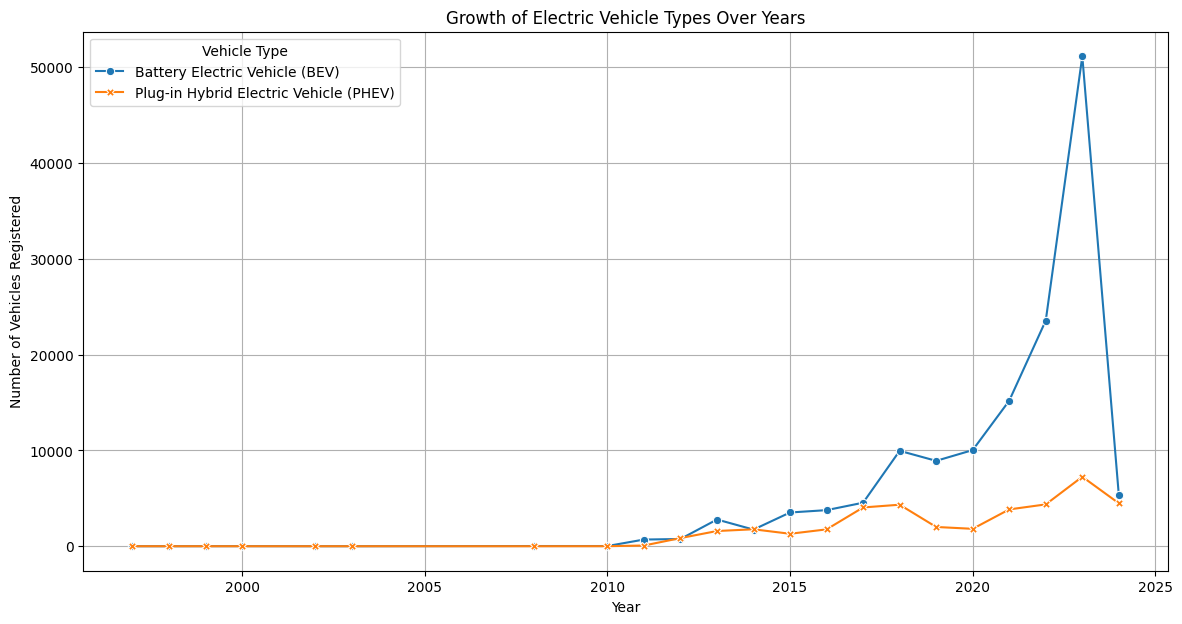

In [87]:
data['Year'] = pd.to_datetime(data['Model Year'], format='%Y')

yearly_growth = data.groupby([data['Year'].dt.year, 'Electric Vehicle Type']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_growth, markers=True, dashes=False)
plt.title('Growth of Electric Vehicle Types Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Registered')
plt.grid(True)
plt.legend(title='Vehicle Type')
plt.show()

C:\Users\b1439\AppData\Local\Temp\ipykernel_22948\3820622837.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='Number of Vehicles', y='City', palette='viridis')


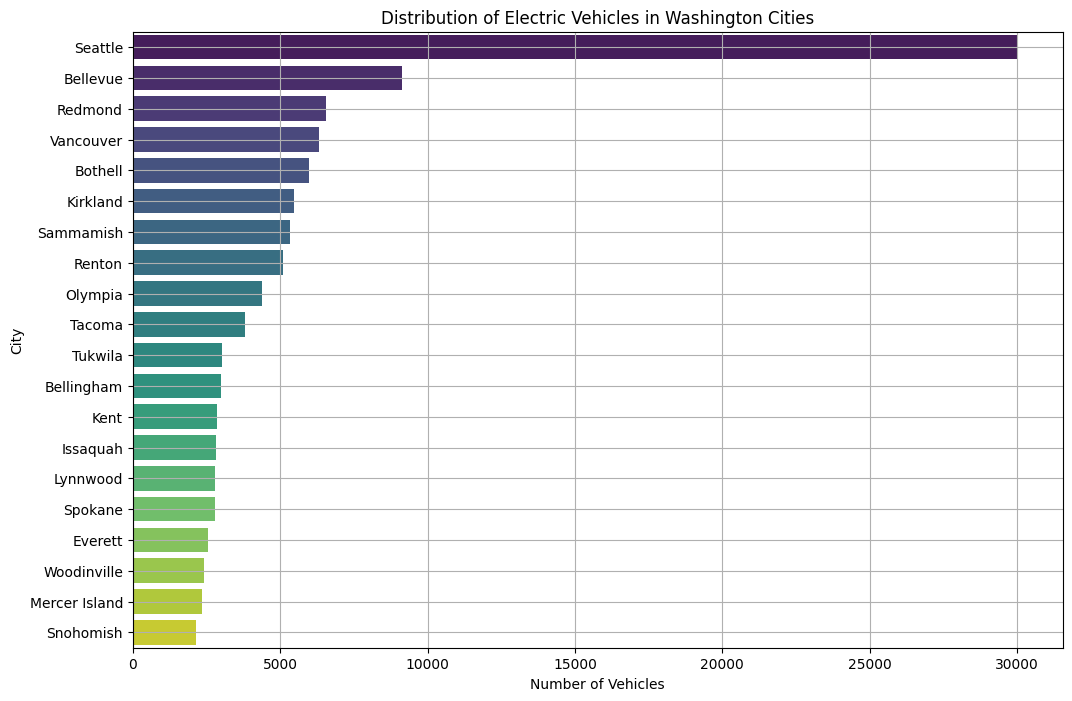

In [88]:
city_distribution = data['City'].value_counts().reset_index()
city_distribution.columns = ['City', 'Number of Vehicles']

# To make the chart clearer, display the top 20 cities
top_cities = city_distribution.head(20)

# Plotting using matplotlib and seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=top_cities, x='Number of Vehicles', y='City', palette='viridis')
plt.title('Distribution of Electric Vehicles in Washington Cities')
plt.xlabel('Number of Vehicles')
plt.ylabel('City')
plt.grid(True)
plt.show()


C:\Users\b1439\AppData\Local\Temp\ipykernel_22948\3050359561.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=make_distribution, x='Number of Vehicles', y='Make', palette='viridis')


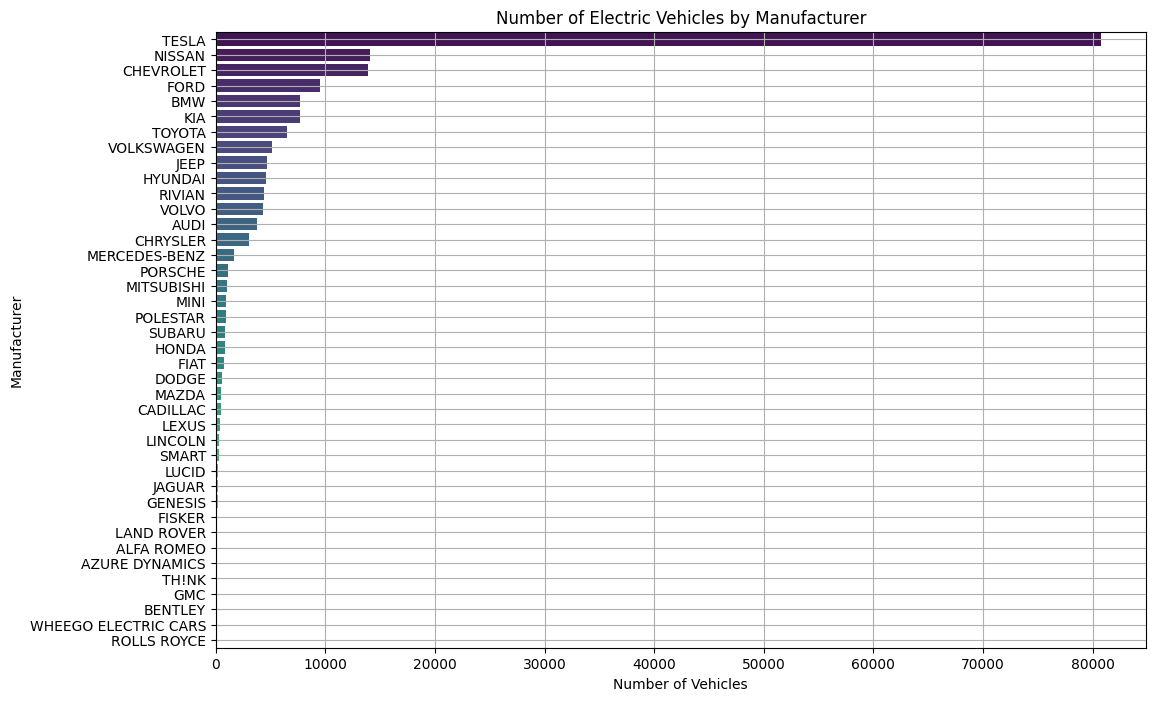

In [89]:
make_distribution = data['Make'].value_counts().reset_index()
make_distribution.columns = ['Make', 'Number of Vehicles']

plt.figure(figsize=(12, 8))
sns.barplot(data=make_distribution, x='Number of Vehicles', y='Make', palette='viridis')
plt.title('Number of Electric Vehicles by Manufacturer')
plt.xlabel('Number of Vehicles')
plt.ylabel('Manufacturer')
plt.grid(True)
plt.show()

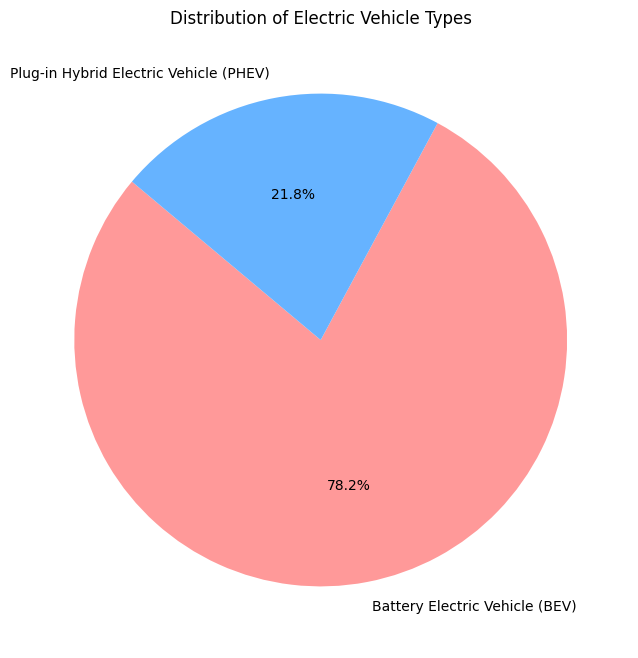

In [90]:
vehicle_type_counts = data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Electric Vehicle Types')
plt.show()

plt.show()

C:\Users\b1439\AppData\Local\Temp\ipykernel_22948\1344997970.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Model Year', y='Electric Range', data=filtered_data, alpha=0.6, edgecolor=None, palette='viridis')


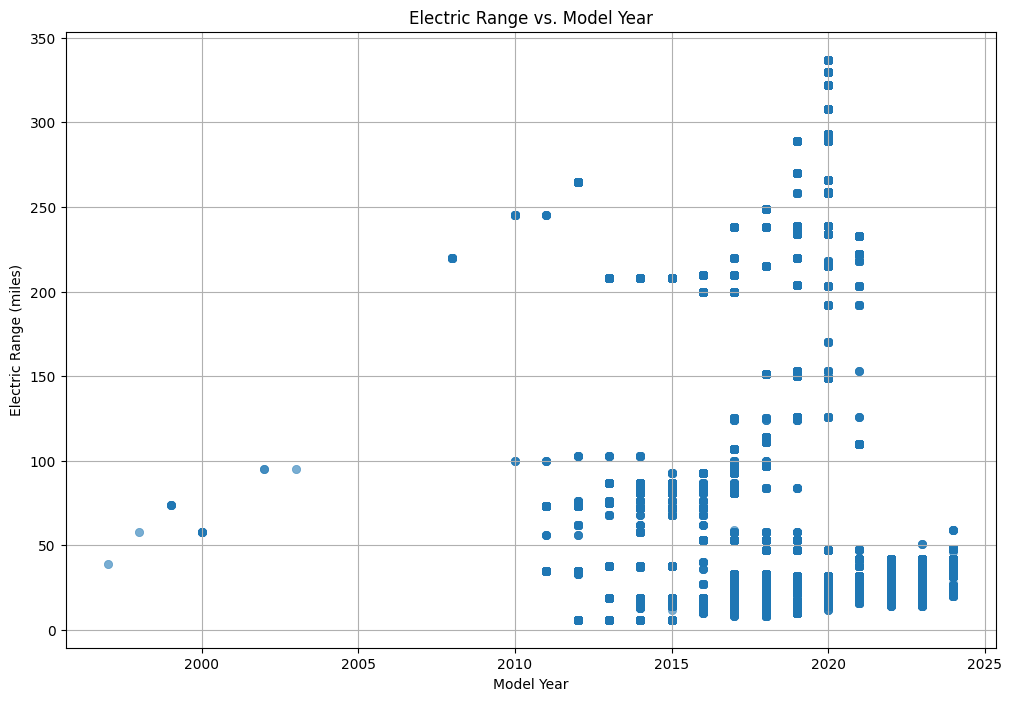

In [91]:
filtered_data = data[data['Electric Range'] > 0]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Model Year', y='Electric Range', data=filtered_data, alpha=0.6, edgecolor=None, palette='viridis')
plt.title('Electric Range vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.grid(True)
plt.show()

C:\Users\b1439\AppData\Local\Temp\ipykernel_22948\604254199.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Electric Vehicle Type', y='Electric Range', data=data, alpha=0.6, edgecolor=None, palette='viridis')


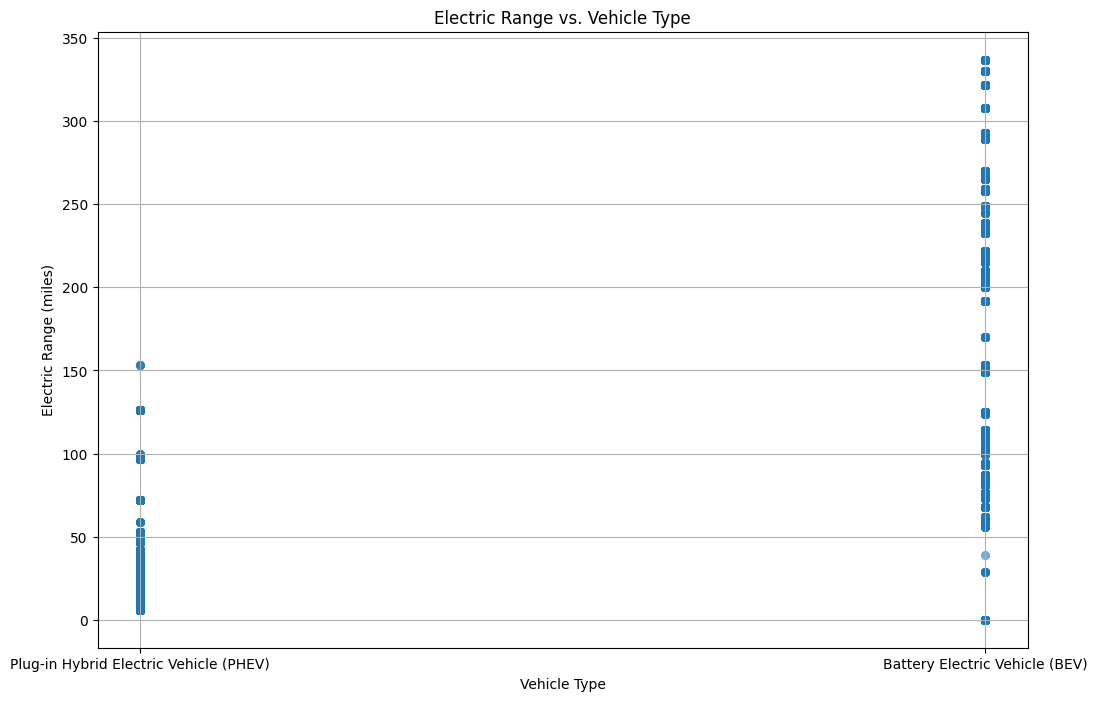

In [92]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Electric Vehicle Type', y='Electric Range', data=data, alpha=0.6, edgecolor=None, palette='viridis')
plt.title('Electric Range vs. Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Electric Range (miles)')
plt.grid(True)
plt.show()

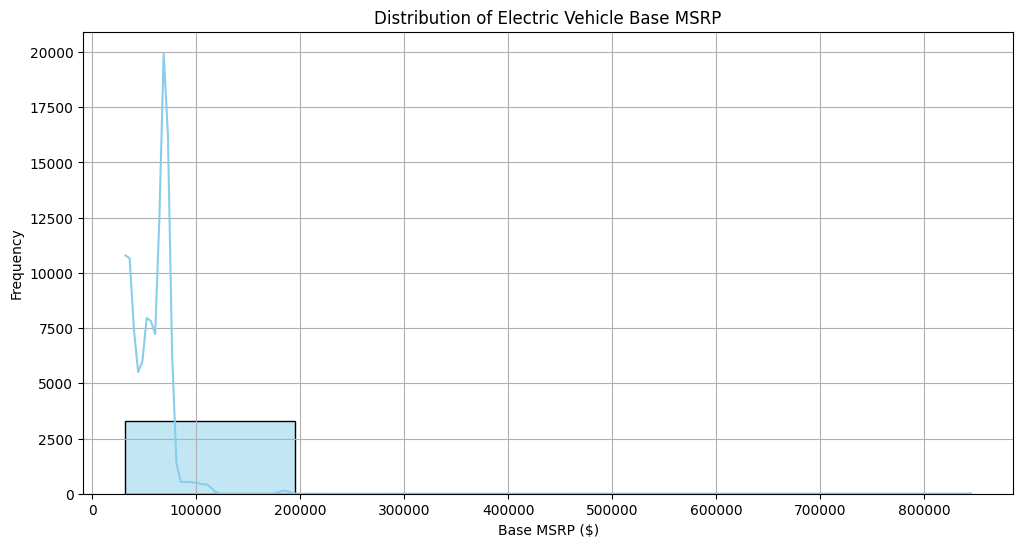

In [93]:
filtered_data = data[data['Base MSRP'] > 0]

plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['Base MSRP'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Electric Vehicle Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

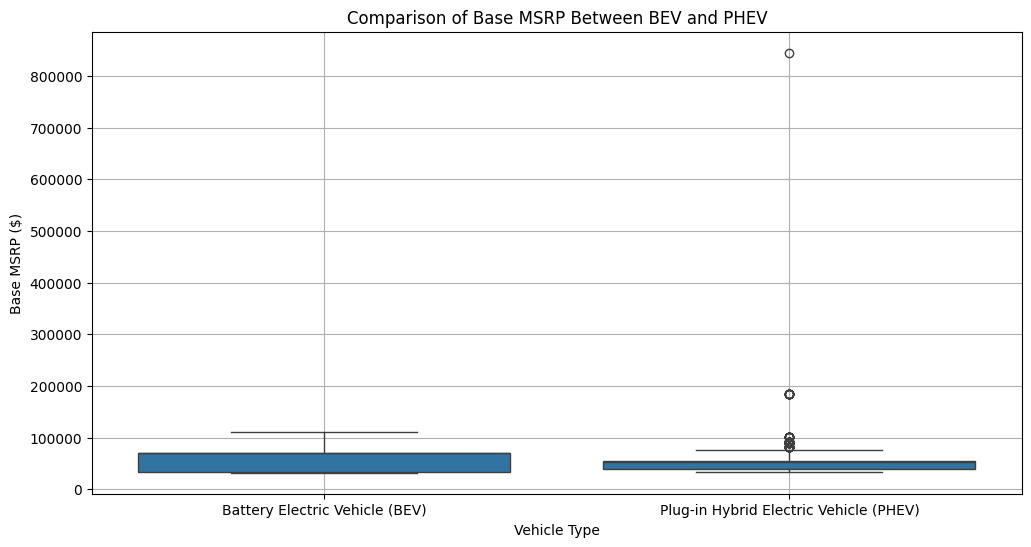

In [94]:
filtered_data = data[(data['Base MSRP'] > 0) & (data['Electric Vehicle Type'].isin(['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']))]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=filtered_data)
plt.title('Comparison of Base MSRP Between BEV and PHEV')
plt.xlabel('Vehicle Type')
plt.ylabel('Base MSRP ($)')
plt.grid(True)
plt.show()

Model 1

In [95]:
# Load data
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Convert year to numerical data
data['Year'] = pd.to_datetime(data['Model Year'].astype(str), format='%Y').dt.year

# Convert electric vehicle type to numerical data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Electric Vehicle Type'])

# Define features
X = data[['Year']]  # Using year as a feature

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Perform prediction
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

# To predict future data, we can create a dataframe, for example, to predict data for the year 2025
future_year = np.array([[2025]])
predicted_distribution = model.predict(future_year)
print(label_encoder.inverse_transform(predicted_distribution))

Accuracy: 0.7819629670450788
                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       0.79      0.98      0.88     28390
Plug-in Hybrid Electric Vehicle (PHEV)       0.49      0.06      0.11      7902

                              accuracy                           0.78     36292
                             macro avg       0.64      0.52      0.49     36292
                          weighted avg       0.73      0.78      0.71     36292

['Battery Electric Vehicle (BEV)']


c:\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Model 2

In [96]:
# Calculate the number of electric vehicles per year
yearly_counts = data.groupby('Model Year').size()

# Prepare the data
X = yearly_counts.index.values.reshape(-1, 1)  # Years
y = yearly_counts.values  # Counts

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)

# Perform prediction
y_pred_poly = poly_model.predict(X_test)

# Calculate R² score and MSE
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print(f'Polynomial Regression R² score: {r2_poly}')
print(f'Polynomial Regression Mean Squared Error: {mse_poly}')

# Predict the total number of electric vehicles for future years
future_years = np.array([[2025], [2030]])
predictions_poly = poly_model.predict(future_years)
print(predictions_poly)


Polynomial Regression R² score: 0.6921868712694943
Polynomial Regression Mean Squared Error: 9269807.46687501
[35014.15868205 56882.98350412]
